In [1]:
# Normal Equation learning

In [2]:
import numpy as np

# Test equation
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.rand(100,1)

In [3]:
# Normal euqation 
x_b = np.c_[np.ones((100,1)),x] # Initialize with 1s
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[4.55269421],
       [2.93510209]])

In [5]:
# Making pred using theta_best
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_pred = x_new_b.dot(theta_best)
y_pred

array([[ 4.55269421],
       [10.4228984 ]])

In [6]:
import matplotlib.pyplot as plt

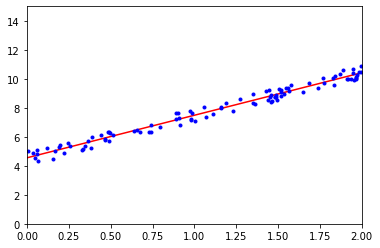

In [7]:
# Plotting predictions
plt.plot(x_new, y_pred, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [8]:
# Linear rerssion with sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.55269421]), array([[2.93510209]]))

In [9]:
lin_reg.predict(x_new)

array([[ 4.55269421],
       [10.4228984 ]])

In [10]:
# scipy least square linear regression equivalent
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[4.55269421],
       [2.93510209]])

In [11]:
# Calculate using pseudoinverse (normal equation doesnt work when there are more features than sample)
np.linalg.pinv(x_b).dot(y)

array([[4.55269421],
       [2.93510209]])

In [12]:
# Batch gradient descent

In [13]:
# Manual implementation
eta = 0.1                    # Learning rate
n_iterations = 1000          # steps
m = 100                      # observations

theta = np.random.randn(2,1) # Random initailization

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.55269421],
       [2.93510209]])

In [15]:
# Sochastic gradient descent

In [16]:
n_epochs = 50
t0, t1 = 5, 5   # Learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients        

In [17]:
theta

array([[4.53409523],
       [2.9335904 ]])

In [18]:
# SGD with scikitlearn

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.52340373]), array([2.94673919]))

In [21]:
# Polymonial Regression

In [22]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

In [23]:
# sklearn transformation squaring training data

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([2.21662987])

In [25]:
x_poly[0]

array([2.21662987, 4.91344797])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.88530416]), array([[0.93370483, 0.50990772]]))

In [27]:
# Learning curve

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for i in range(1, len(x_train)):
        model.fit(x_train[:i], y_train[:i])
        y_train_predict = model.predict(x_train[:i])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:i], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

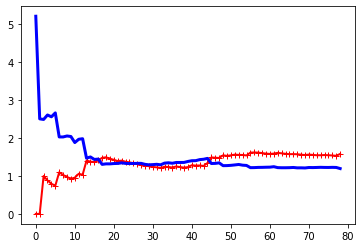

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

In [30]:
# 10th degree polynomial

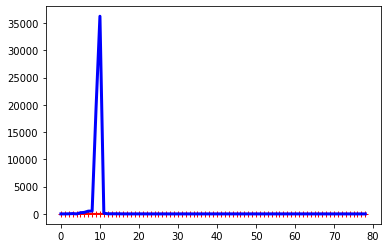

In [31]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, x, y)

In [32]:
# Regularized linear models

In [33]:
# Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[4.57990846]])

In [35]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([4.55169965])

In [36]:
# Lasso regression

In [37]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

array([4.52996206])

In [38]:
# Elastic net

In [39]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([4.53467888])

In [40]:
# Early stopping

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sg_reg.fit(x_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(x_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [43]:
# Logistic Regression

In [44]:
# Iris Iris-Virginica classifier

In [45]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [46]:
x = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x, y)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
# Exstimated probalities for 1 feature

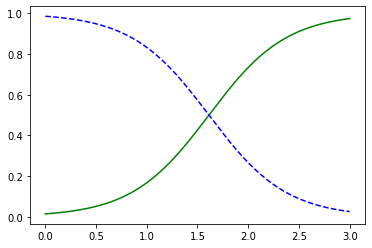

In [51]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], 'g-', label='Iris-Virginica')
plt.plot(x_new, y_proba[:, 0], 'b--', label='Not Iris-Virginica')

In [52]:
# Softmax regression

In [53]:
# Use petal length and width as predictors
x = iris['data'][:, (2, 3)]
y = iris['target']

In [54]:
# sklearn softmax
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# Predict iris with 5cm long and 2cm wide petal
softmax_reg.predict([[5,2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])